In [1]:
import numpy as np
from networkx import nx
from collections import defaultdict
from itertools import combinations

import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Hilfsfunktionen

In [2]:
def find_double_edge(triad_edge_data):
    for i in triad_edge_data:
        for j in triad_edge_data:
            if (i[0]==j[1] and i[1]==j[0]):
                x = i[0]
                y = i[1]
    return x,y

def find_double_edge2(triad_edge_data):
    double_edges = []
    for i in triad_edge_data:
        for j in triad_edge_data:
            if (i[0]==j[1] and i[1]==j[0]):
                x = i[0]
                y = i[1]
                double_edges.append((x,y))
    return double_edges

def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup 



In [3]:
def triads_by_specific_types(G, my_types):
    """Returns a list of triads of pre-defined types in a directed graph.
    Parameters
    ----------
    G : digraph
       A NetworkX DiGraph
    Returns
    -------
    tri_by_type : dict
       Dictionary with triad types as keys and lists of triads as values.
    """
    all_tri = nx.all_triads(G)
    tri_by_type = defaultdict(list)
    for triad in all_tri:
        if (nx.triad_type(triad) in my_types):
            name = nx.triad_type(triad)
            tri_by_type[name].append(triad)
    return tri_by_type



def balance_for_2_semicycles(triad_edge_data):
    semicycle_balance = 1
    x, y = find_double_edge(triad_edge_data)
    positive_set = []
    negative_set = []
    
    # calculating balance/imbalance for both semicycles
    for edge in triad_edge_data:
        semicycle_balance *= (edge[2])['weight']
        
    for edge in triad_edge_data:
        if ((x == edge[0]) and (y == edge[1])):
            semicycle_balance_1 = semicycle_balance / ((edge[2])['weight'])
        if ((x == edge[1]) and (y == edge[0])):
            semicycle_balance_2 = semicycle_balance / ((edge[2])['weight'])
            
    # checking for both semicycles if balanced or imbalanced   
    if (semicycle_balance_1 > 0):
        positive_set.append(semicycle_balance_1)
    else:
        negative_set.append(semicycle_balance_1)
            
    if (semicycle_balance_2 > 0):
        positive_set.append(semicycle_balance_2)
    else:
        negative_set.append(semicycle_balance_2)
            
    triangle_balance = len(positive_set)/(len(positive_set) + len(negative_set))   # step 8 in algorithm             
    return triangle_balance


def semicycle_extraction(double_edges):
    triplets = combinations(double_edges, 3)
    triple = []
    cycles = []
    delete = []
    semicycles = []
    
    for triplet in triplets:
        triple.append(triplet)
        
    for i in range(len(triple)):
        if (Reverse((triple[i])[0]) in triple[i]):
            delete.append(triple[i])
        elif (Reverse((triple[i])[1]) in triple[i]):
            delete.append(triple[i])
        else:
            cycles.append(triple[i])
            
    nodes = []
    for tuples in cycles[0]:
        nodes.append(tuples[0])
        nodes.append(tuples[1])
    unique_nodes = np.unique(nodes)

    a = unique_nodes[0]
    b = unique_nodes[1]
    c = unique_nodes[2]
            
    for cycle in cycles:
        if ((a,b) in cycle and (b,c) in cycle and (c,a) in cycle):
            delete.append(cycle)
        elif ((b,a) in cycle and (c,b) in cycle and (a,c) in cycle):
            delete.append(cycle)
        else:
            semicycles.append(cycle)

    return semicycles



def balance_for_triad_type_300(triad_edge_data):
    semicycle_balance = 1
    double_edges = find_double_edge2(triad_edge_data)
    semicycles = semicycle_extraction(double_edges)
    
    positive_set = []
    negative_set = []    
    
    #for semicycle in semicycles:
    #    semi
    
    
    for cycle in semicycles:
        semicycle_balance = 1
        for i in range(3):
            for edge in triad_edge_data:
                if (cycle[i] == (edge[0], edge[1])):
                    semicycle_balance *= edge[2]['weight']
        if semicycle_balance > 0:
            positive_set.append(semicycle_balance)
        else:
            negative_set.append(semicycle_balance)
            
    triangle_balance = len(positive_set)/(len(positive_set) + len(negative_set))   # step 8 in algorithm             
    return triangle_balance

# Balance Ratio Function

In [4]:
def balance_ratio(graph):
    my_types = {'030T', '120D', '120U', '300'}
    triads = triads_by_specific_types(graph, my_types)
    
    sum_balance_030T = 0
    sum_balance_120D = 0
    sum_balance_120U = 0
    sum_balance_300 = 0
    
    for triad_type in my_types:
        for i in range(len(triads[triad_type])):
            
            if (triad_type == '030T'):
                edge_data = ((triads['030T'])[i]).edges(data = True)
                semicycle_balance_030T = 1
                for edge in edge_data:
                    semicycle_balance_030T *= (edge[2])['weight']
                if (semicycle_balance_030T > 0):
                    sum_balance_030T += 1                   
                else:
                    sum_balance_030T += 0
                
                
            elif (triad_type == '120D'):
                edge_data = ((triads['120D'])[i]).edges(data = True)
                triangle_balance_120D = balance_for_2_semicycles(edge_data)
                
                sum_balance_120D += triangle_balance_120D
                
            elif (triad_type == '120U'):
                edge_data = ((triads['120U'])[i]).edges(data = True)
                triangle_balance_120U = balance_for_2_semicycles(edge_data)
                
                sum_balance_120U += triangle_balance_120U
                
            
            elif (triad_type == '300'):
                edge_data = ((triads['300'])[i]).edges(data = True)
                triangle_balance_300 = balance_for_triad_type_300(edge_data)
                
                sum_balance_300 += triangle_balance_300
            
    
    overall_balance_030T = sum_balance_030T / len(triads['030T'])
    overall_balance_120D = sum_balance_120D / len(triads['120D'])
    overall_balance_120U = sum_balance_120U / len(triads['120U'])
    overall_balance_300 = sum_balance_300 / len(triads['300'])
    
    average_overall_balance = (overall_balance_030T + overall_balance_120D + overall_balance_120U + overall_balance_300) / 4
    return average_overall_balance
    
    

# Example Testgraph

In [5]:
edgesAfter = pd.read_csv("../data/test.csv")
# edgesAfter = pd.read_csv("../data/votes_to_comments_after.csv")

In [6]:
G = nx.from_pandas_edgelist(edgesAfter, 
                            source='source', 
                            target='target', 
                            edge_attr = 'weight',
                            create_using=nx.DiGraph())

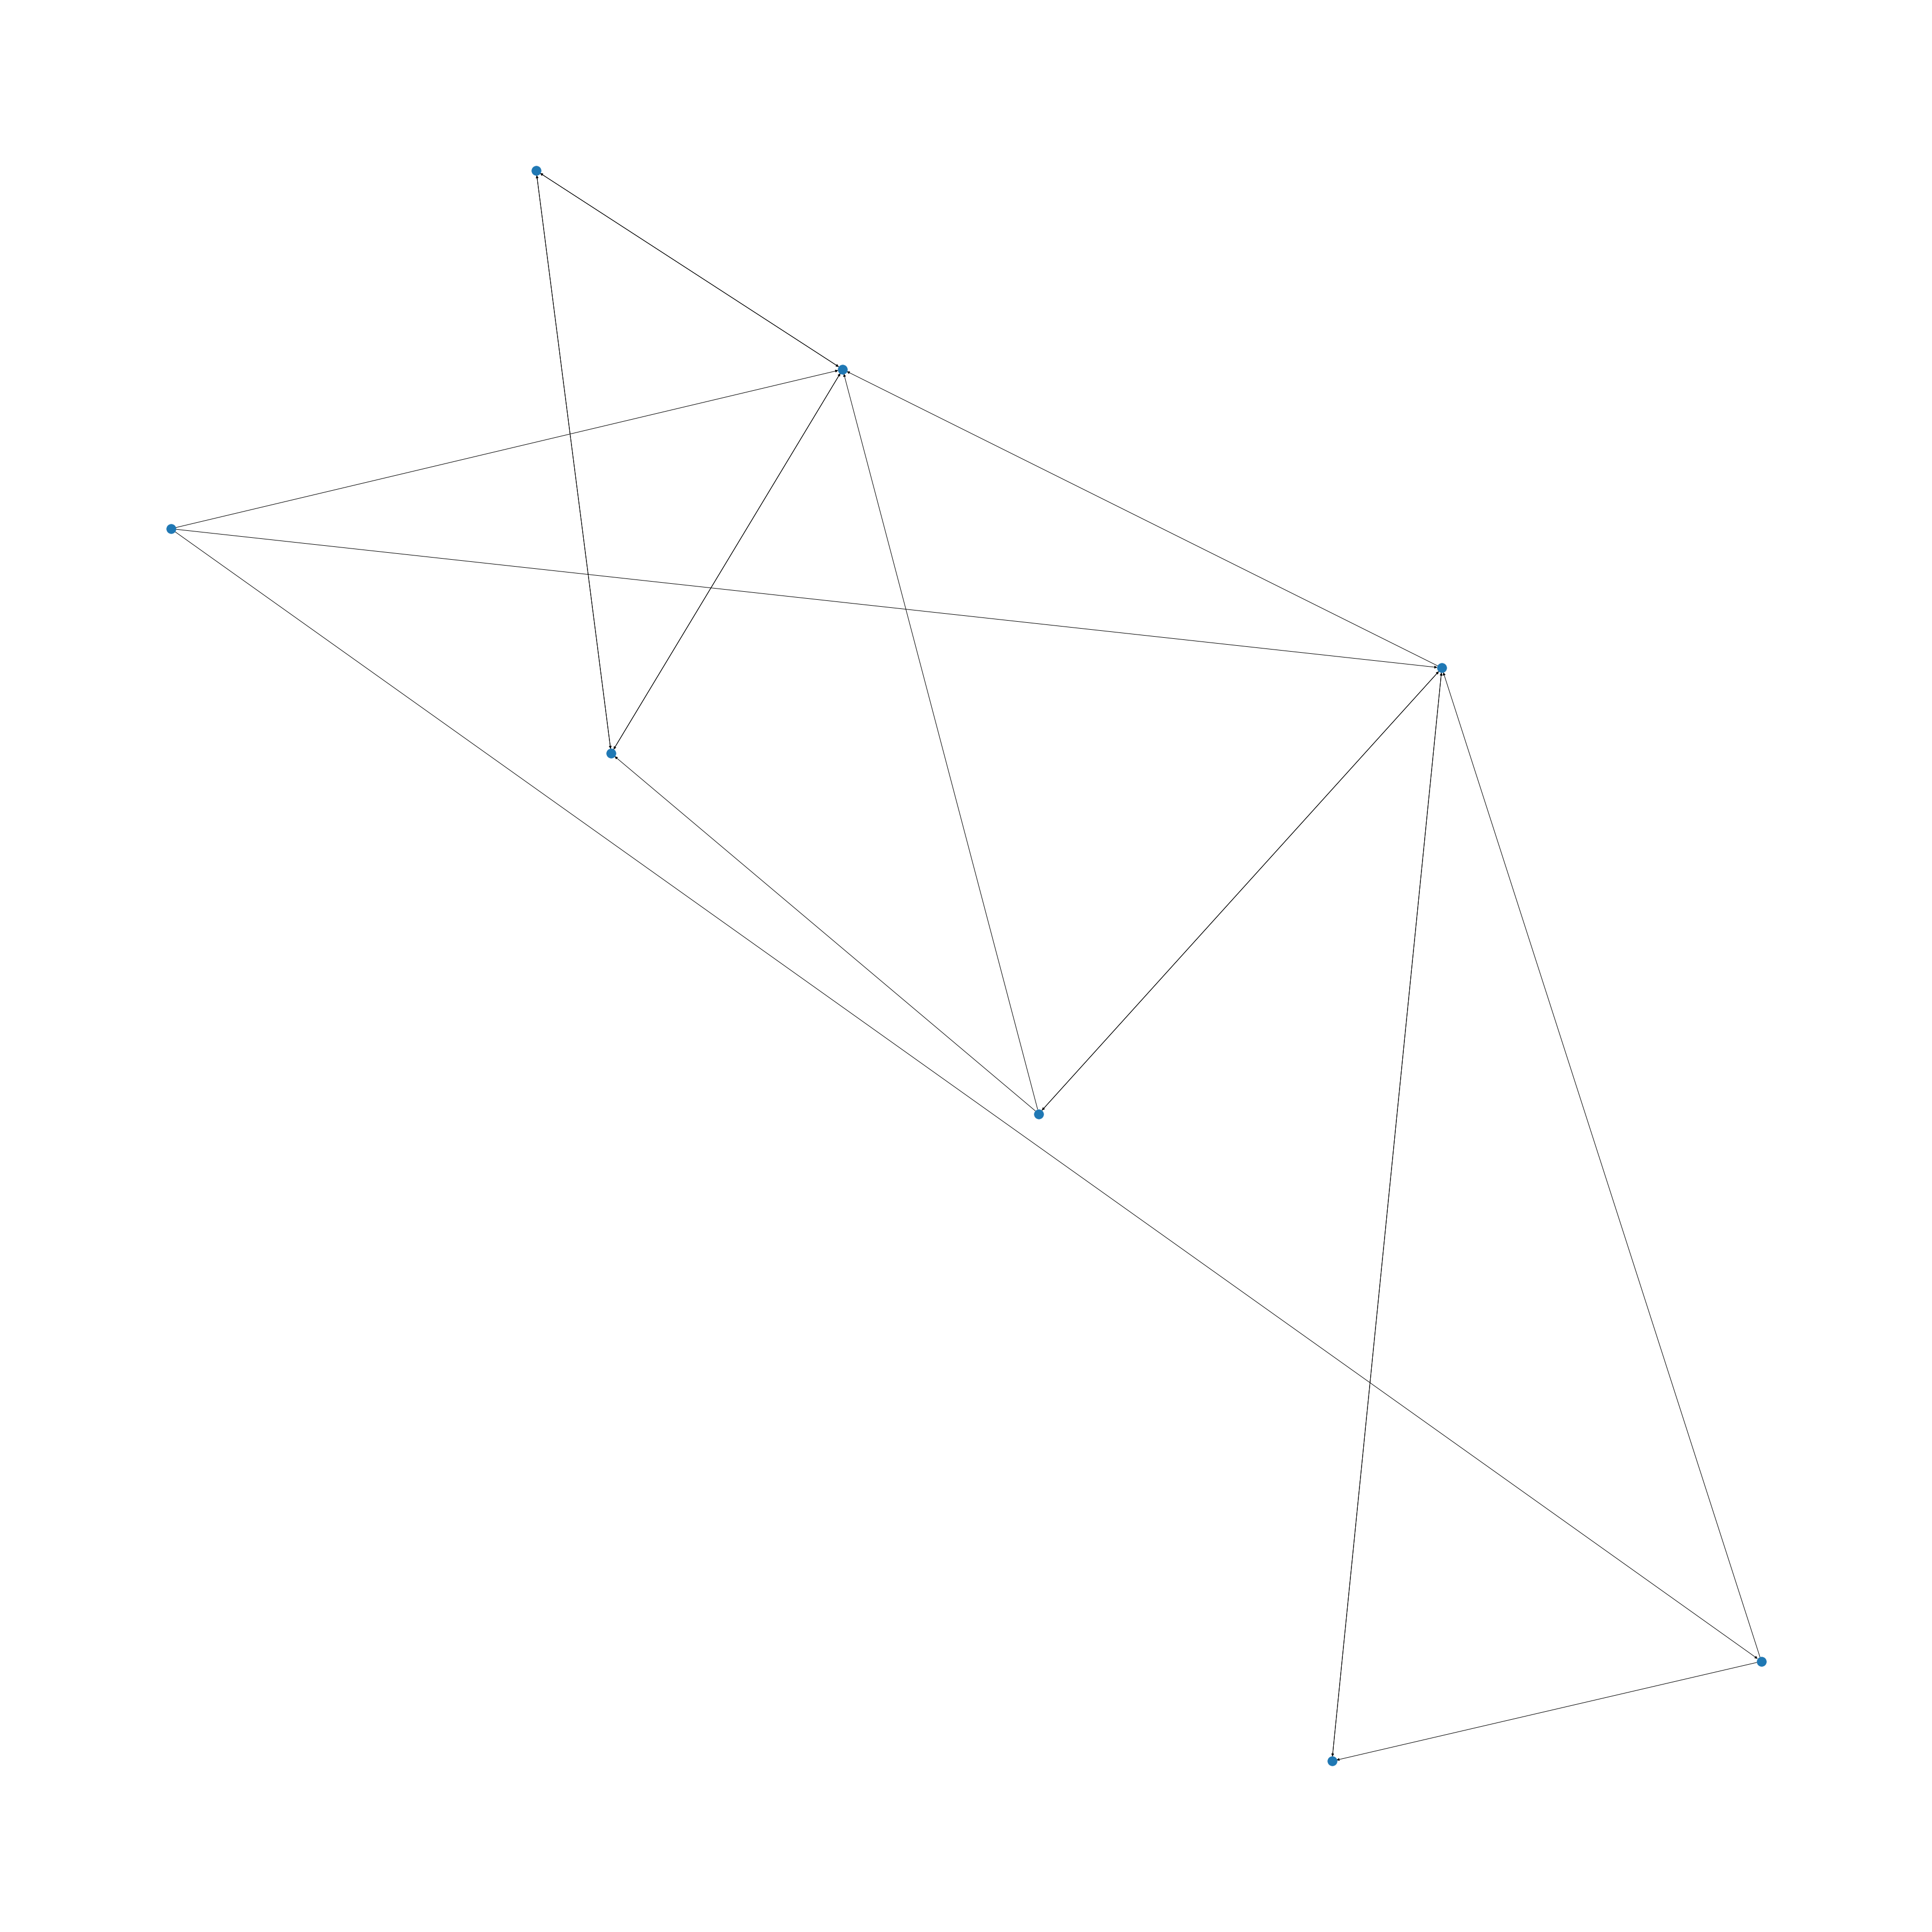

In [7]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G)
plt.show()

In [8]:
x = nx.triadic_census(G)
x

{'003': 6,
 '012': 17,
 '102': 11,
 '021D': 1,
 '021U': 1,
 '021C': 2,
 '111D': 9,
 '111U': 2,
 '030T': 2,
 '030C': 0,
 '201': 1,
 '120D': 2,
 '120U': 1,
 '120C': 0,
 '210': 0,
 '300': 1}

In [9]:
balance_ratio(G)

0.8125